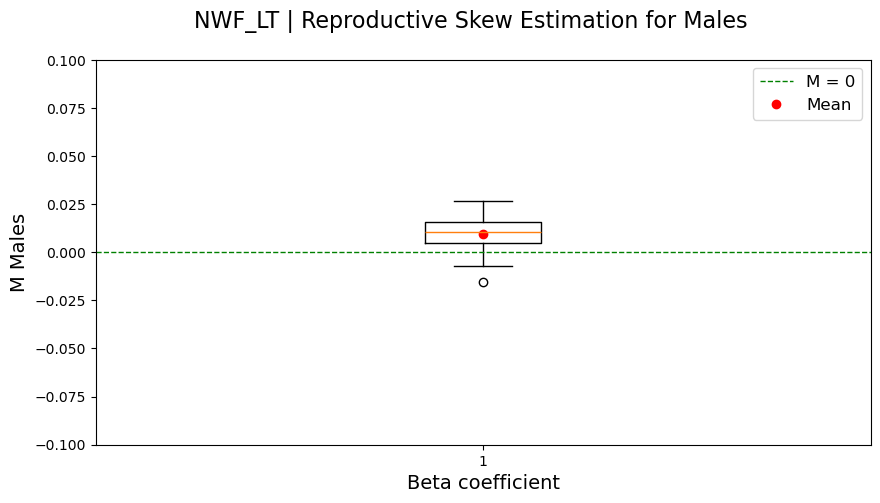

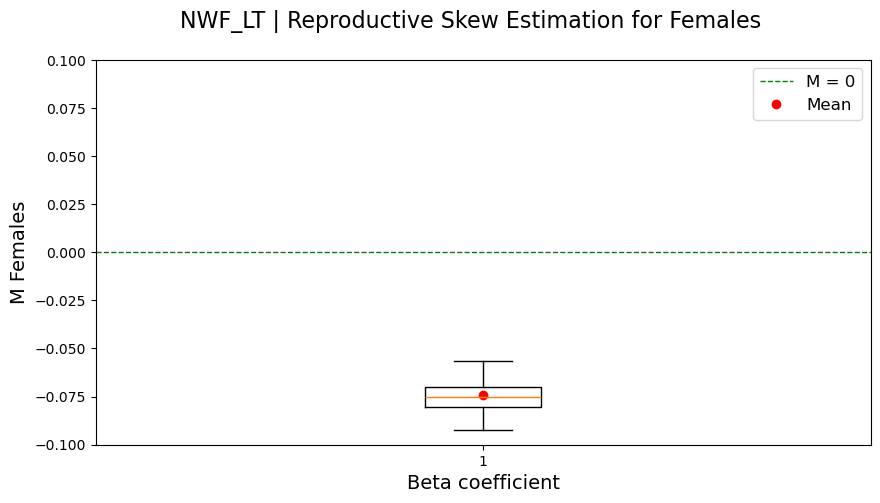

In [1]:
#Number of offsprings
import matplotlib.pyplot as mp
import numpy as np
import os 
from collections import Counter
import pandas as pd
from scipy.stats import multinomial
from IPython.display import display

#------------------------------------------------------------------------------------------------------------------
## Fonctions
#------------------------------------------------------------------------------------------------------------------

def Multinomial (n,p):
    """
    Fonction qui simule la realisation d'une d'une loi multinomial de parametres n et p 
    """
    Sortie = [0 for j in range (len(p))]
    for k in range(n):
        u = random.random()
        i = 0
        sp = p[i]
        while u >= sp:
            i += 1
            sp += p[i]
        Sortie [i] += 1
    return Sortie     

def M(r,r_bar,R,N):
    S = 0
    for i in range(N):
        S+= (r[i] - r_bar[i])**2
    return (N/R**2)*S

#------------------------------------------------------------------------------------------------------------------
## Main Program
#------------------------------------------------------------------------------------------------------------------
FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/RepSkew/NWFLT_RepSkew_Beta/"
#FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/NWF_AoD_NOff_AD/"

#Beta = [1,2,5,10,20,40]
Beta = [1]
Data = pd.DataFrame({})
Param = pd.DataFrame({})

L_RepM = [0 for i in range (len(Beta))]
L_RepF = [0 for i in range (len(Beta))]
counter = 0

for beta in Beta:
    LRm = []
    LTm = []
    LNm = []
    LRSm = []
    LRf = []
    LTf = []
    LNf = []
    LRSf = []
    
    for i in range(1,51):
        rf = []
        rm = []
        tf = []
        tm = []
        File = FOLDER + f'NWFLT_aod_no_RepSkew_Beta{beta},{i}.txt'
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            for i in range (0,30000,3):
                if Values[i] == "F":
                    if float(Values[i+1]) > 3: 
                        rf.append(float(Values[i+2]))
                        tf.append(float(Values[i+1])-4)
                elif Values[i] == "M":
                    if float(Values[i+1]) > 4: 
                        rm.append(float(Values[i+2]))
                        tm.append(float(Values[i+1])-5)
            
            Text.close()
            
            # Males Reproductive Skew
            Rm = sum(rm)
            Tm = sum(tm) 
            Nm = len(rm)
            rm_bar = []
            #print(beta, Rm)
            for ti in tm:
                rm_bar.append(ti*Rm/Tm)
            Mm_observed = M(rm,rm_bar,Rm,Nm)
            Mm_multi = 0
            for j in range (10):
                rm_multi = multinomial.rvs(Rm, [ti/Tm for ti in tm])
                Mm_multi += M(rm_multi,rm_bar,Rm,Nm)
            RSm = Mm_observed - Mm_multi/10
                    
            # Females Reproductive Skew
            Rf = sum(rf)
            Tf = sum(tf) 
            Nf = len(rf)
            rf_bar = []
            for ti in tf:
                rf_bar.append(ti*Rf/Tf)
            Mf_observed = M(rf,rf_bar,Rf,Nf)
            Mf_multi = 0
            for j in range (10):
                rf_multi = multinomial.rvs(Rf, [ti/Tf for ti in tf])
                Mf_multi += M(rf_multi,rf_bar,Rf,Nf)
            RSf = Mf_observed - Mf_multi/10 
    
            LRSm.append(RSm)
            LRSf.append(RSf)
            
    RSm_mean = np.mean(LRSm)
    RSf_mean = np.mean(LRSf)
    L_RepM [counter] = LRSm
    L_RepF [counter] = LRSf
    counter += 1

    
fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWF_LT | Reproductive Skew Estimation for Males", fontsize=16)

ax.boxplot(L_RepM,tick_labels=Beta)
ax.set_xlabel("Beta coefficient",fontsize = 14)
ax.set_ylabel("M Males",fontsize = 14)
ax.axhline(y=0, color='green', linestyle='--',linewidth=1, label='M = 0')
ax.set_ylim([-0.1,0.1])
meansM = [np.mean(group) for group in L_RepM]
ax.plot(range(1, len(meansM) + 1), meansM, 'ro', label='Mean')  # 'ro' pour des points rouges
ax.legend(fontsize = 12)

#fig.savefig(FOLDER_output+'RepSkew_PiRatio.png') 
mp.show()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWF_LT | Reproductive Skew Estimation for Females", fontsize=16)

ax.boxplot(L_RepF,tick_labels=Beta)
ax.set_xlabel("Beta coefficient",fontsize = 14)
ax.set_ylabel("M Females",fontsize = 14)
ax.axhline(y=0, color='green', linestyle='--',linewidth=1, label='M = 0')
meansF = [np.mean(group) for group in L_RepF]
ax.plot(range(1, len(meansF) + 1), meansF, 'ro', label='Mean')  # 'ro' pour des points rouges
ax.set_ylim([-0.1,0.1])
ax.legend(fontsize = 12)

#fig.savefig(FOLDER_output+'RepSkew_PiRatio.png') 
mp.show()


